<a href="https://colab.research.google.com/github/sairamadithya/biomedical_instument_detection/blob/main/biomedical_instrument_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE FOLLOWING STEPS ARE INVOLVED IN THE ENTIRE PROCESS OF IMAGE CLASSIFICATION

1.IMPORTING LIBRARIES


2.IMAGE PROCESSING


3.MODEL CREATION

4.MODEL COMPILATION

5.MODEL TRAINING

6.MODEL EVALUATION

7.MODEL PREDICTION


# STEP 1-importing essential libraries

tensorflow is a deep learning framework suitable for applications involving neural networks.

using tensorflow we can build,train,evaluate and predict our neural network.

In [1]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

#loading the dataset

the dataset is created by my own and it is present in the google drive. the following code can be used to mount the drive on the colab.

after running the code, click onto the link to get the authorization code, copy paste the code and enter to mount the drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


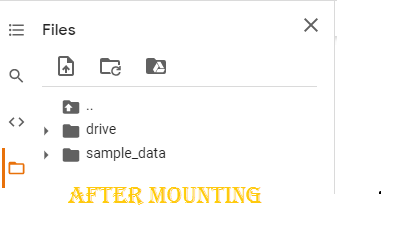


# STEP 2-image processing

the imagedatagenerator is used to implement data augmentation. we can process the image as we want and create batches of image data.

check this link for further details:- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [3]:
#image moulding
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True,vertical_flip=True)
 
test_dataset = image.ImageDataGenerator(rescale=1./255) #no transformations are applied to the testing dataset to maintain its originality

The images in digital world have pixels whose intensities range from 0 to 255 where black being 0 and white being 255.The rescaling of 1./255 allows it to convert to decimals values ranging from 0 to 1.

the flow_from_directory allow us to use the images availabe in the google colab files section. the dataset contains images of variable size. hence it is essential to reshape them to (224,224). (the input dimensions for pretrained model) 

the batch size is an important parameter which can affect the training time and accuracy. less batch size increases accuracy and training time and vice versa. the batch size is taken as powers of two.

In [12]:
# image addressing
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Dataset/val',
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    class_mode = 'binary')

Found 611 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


In [5]:
train_generator.class_indices

{'diagnostic': 0, 'therapeutic': 1}

#STEP 3-model creation 

we are using the pretrained cnn meaning that the cnn is already trained on the imagenet dataset and has the weights stored in it. we are going to customise the model by adding additional layers of our choice(remember more layers can increase parameters leading to overfitting). 

we are using the MobileNetV2 model for this application. this model was developed by google in 2017 and is known for its light memory. this model is ideal for devices with less RAM and processing power like microcomputers and mobiles.

In [6]:
base_for_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)


9412608/9406464 [==============================] - 0s 0us/step


input_shape=(224,224,3) => this is the input dimensions of the model. this is the parameter mentioned in the processing part. the 3 refers to the three channels R,G,B

we are training it partially so as to reduce the traning time on the stake of accuracy. (it is better to train model fully for better results)

In [7]:
for layer in base_for_model.layers:
    layer.trainable = False

the sequential of the keras is used to stack the added layers of one's choice

In [21]:
model = Sequential()
model.add(base_for_model) #mobilenetv2
model.add(GaussianNoise(0.1)) #to prevent overfitting
model.add(GlobalAveragePooling2D()) #to converge and reduce the parameters
model.add(Dense(64, activation = 'relu')) #hidden layer (relu activation function is suggested for images)
model.add(Dropout(0.2)) #to prevent overfitting
model.add(Dense(1, activation='sigmoid')) #output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                81984     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,340,033
Trainable params: 82,049
Non-trainable params: 2,257,984
_______________________________________

#STEP 4- model compilation

In [24]:
adam= tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss= 'binary_crossentropy', metrics='binary_accuracy')

#STEP 5- model training

In [10]:

mp= tf.keras.callbacks.ModelCheckpoint(filepath='mymodel.hdf5', 
                               verbose=2, save_best_only=True)
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.05, patience=8)
callback=[es,mp]

the modelcheckpoint is used to save the best model by saving the model which has the lowest loss

the earlystopping is one of the callbacks used to prevent overfitting. it determines the ideal epoch and halts training at that time with the specified change(min_delta) and (patience) waiting epochs.

TIP- ensure that the gpu (Graphics Processing Unit) is used so as to boost the training speed.

Runtime-> change runtime type -> gpu

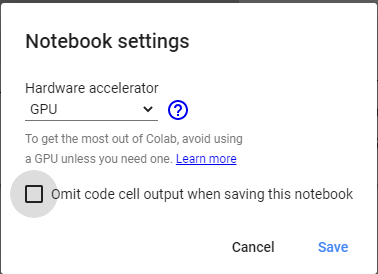

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=19, #steps_per_epoch= training_images/batch_size= 611/32=19
    epochs = 15, #own choice
    validation_data = validation_generator,
    validation_steps=1,
    callbacks=callback
)

Epoch 1/15
19/19 [==============================] - 13s 589ms/step - loss: 0.6520 - binary_accuracy: 0.6595 - val_loss: 0.6548 - val_binary_accuracy: 0.5938

Epoch 00001: val_loss did not improve from 0.27286
Epoch 2/15
19/19 [==============================] - 11s 557ms/step - loss: 0.5834 - binary_accuracy: 0.7133 - val_loss: 0.6053 - val_binary_accuracy: 0.5938

Epoch 00002: val_loss did not improve from 0.27286
Epoch 3/15
19/19 [==============================] - 10s 539ms/step - loss: 0.5362 - binary_accuracy: 0.7306 - val_loss: 0.4773 - val_binary_accuracy: 0.8125

Epoch 00003: val_loss did not improve from 0.27286
Epoch 4/15
19/19 [==============================] - 10s 548ms/step - loss: 0.5030 - binary_accuracy: 0.7496 - val_loss: 0.5062 - val_binary_accuracy: 0.7188

Epoch 00004: val_loss did not improve from 0.27286
Epoch 5/15
19/19 [==============================] - 11s 575ms/step - loss: 0.4702 - binary_accuracy: 0.7772 - val_loss: 0.4179 - val_binary_accuracy: 0.8438

Epoch 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 13/15
19/19 [==============================] - 10s 514ms/step - loss: 0.3125 - binary_accuracy: 0.8636 - val_loss: 0.3385 - val_binary_accuracy: 0.9062

Epoch 00013: val_loss did not improve from 0.26567
Epoch 14/15
19/19 [==============================] - 10s 517ms/step - loss: 0.3035 - binary_accuracy: 0.8739 - val_loss: 0.2741 - val_binary_accuracy: 0.9375

Epoch 00014: val_loss did not improve from 0.26567
Epoch 15/15
19/19 [==============================] - 10s 532ms/step - loss: 0.2846 - binary_accuracy: 0.8774 - val_loss: 0.3418 - val_binary_accuracy: 0.8438

Epoch 00015: val_loss did not improve from 0.26567


using earlystopping we were able to train the model within 4 minutes.

In [26]:
print(history.history.keys())
import matplotlib.pyplot as plt
acc=(history.history['binary_accuracy'])
loss=(history.history['loss'])
val_acc=(history.history['val_binary_accuracy'])
val_loss=(history.history['val_loss'])



dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


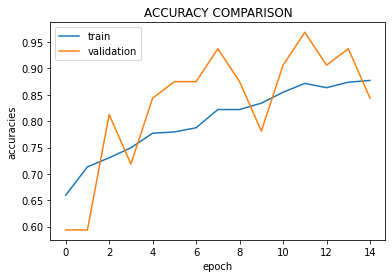

In [27]:

plt.plot(acc)
plt.plot(val_acc)
plt.title('ACCURACY COMPARISON')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('ACCURACY COMPARISON')
plt.legend(['train','validation'])





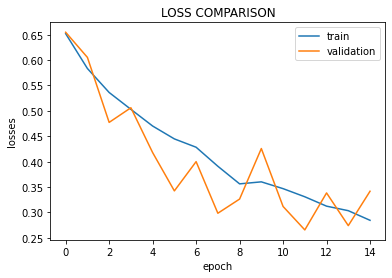

In [28]:
plt.title('LOSS COMPARISON')
plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['train','validation'])

#STEP 6- MODEL EVALUATION

In [29]:
model.evaluate(train_generator)

20/20 [==============================] - 10s 492ms/step - loss: 0.2743 - binary_accuracy: 0.9002


[0.2743445038795471, 0.9001636505126953]

the model has produced a training loss of 0.27 and training accuracy of 90%

In [30]:
model.evaluate(validation_generator)

3/3 [==============================] - 1s 337ms/step - loss: 0.2987 - binary_accuracy: 0.8764


[0.29869285225868225, 0.8764045238494873]

the model has produced a validation loss of 0.29 and validation accuarcy of 87%

#STEP 7- MODEL PREDICTION

1. take any image of biomedical equipment and save the image

2. upload the image in the files section and test the model

In [37]:
img = image.load_img('abc.jpeg',target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)  
ypred = model.predict(img)
if ypred>0.5:
  ypred=1
else:
  ypred=0  
ypred


1

0-diagnostic equipment
1-therapeutic equipment